In [188]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
# k = [np.array(np.random.normal(1, 2, 10)) for i in range(4)]
# print(np.c_[k].transpose())
# print(np.r_[k])

In [180]:
def generate_dataset(size, n_features, theta, std):
    import pandas as pd
    import numpy as np
    assert n_features == len(theta)
    theta = np.array(theta).reshape(len(theta), 1)
    df = pd.DataFrame()
    for i in range(n_features):
        mean = np.random.randint(2, 10)
        std = np.random.randint(2, 15)
        #print('mean : {}'.format(mean))
        #print('std : {}'.format(std))
        df['f_{}'.format(i+1)] = np.random.normal(mean, std, size)
    features_values = df[:].to_numpy()
    #print(features_values.shape)
    error = np.random.randn(size).reshape(size, 1)*std
    df['t'] = features_values.dot(theta) + error
    return df

In [181]:
def ols(x, y):
    m = len(x)
    x_bias = np.c_[np.ones(m), x]
    x_transpose = np.transpose(x_bias)
    #print(x_bias)
    #print(x_bias.transpose())
    x_transpose_dot_x = x_transpose.dot(x_bias)
    inv_x_transpose_dot_x = np.linalg.inv(x_transpose_dot_x)
    x_transpose_dot_y = x_transpose.dot(y)
    theta_pred = inv_x_transpose_dot_x.dot(x_transpose_dot_y)
    return theta_pred[1:]

In [182]:
def predict(x_input, theta):
    x_input = x_input.to_numpy()
    y_pred = x_input.dot(theta)
    return y_pred

In [183]:
def rmse(y_pred, y):
    return np.sqrt(np.mean(np.square(np.subtract(y_pred, y))))

In [184]:
size = 1000
n_features = 8
theta = [1, 4, 3, 6, 2, 1, 3, 5]
std = 10
# train_data, test_data = a.iloc[:int(0.7*size), :], a.iloc[int(0.7*size):, :]



In [196]:
a = generate_dataset(size, n_features, theta, std)
xtrain, xtest, ytrain, ytest = train_test_split(a.iloc[:, :-1], a.iloc[:, -1], test_size=0.3)
weights = ols(xtrain, ytrain)
pred_values = predict(xtest, weights)
rmse_output = rmse(pred_values, ytest)
print('Theta values : {}'.format(weights))
print('-------------------------')
# print('    Predicted   Actual')
# print(np.c_[pred_values, test_data.iloc[:, -1]])
# print('-------------------------')
print('Root mean squared error: {}'.format(rmse_output))

Theta values : [0.96966393 4.01034926 2.95715561 5.97873939 2.0253993  1.00841712
 2.98394826 5.02355485]
-------------------------
Root mean squared error: 6.2931087056015045


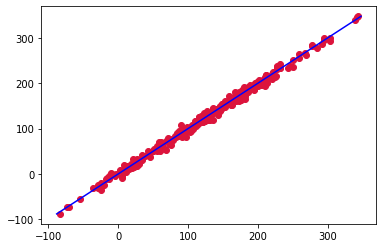

In [197]:
plt.scatter(ytest, pred_values, c='crimson')
p1 = max(max(pred_values), max(ytest))
p2 = min(min(pred_values), min(ytest))
plt.plot([p1, p2], [p1, p2], 'b-') # the equation of x = y, (passes through origin)
plt.show()